In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd
from IPython.display import Markdown

In [3]:
now = datetime.now().date()
offset = MonthEnd()

<h3>Загрузка исходных данных</h3>

In [114]:
names=['geo', 'url', 'note', 'cost', 'duration']
data = pd.read_csv('../raw_data.csv', names=names, index_col=[0,1]).fillna('')

In [115]:
%store -r organic
%store -r positions
%store -r positions_dynamic

<h2>1. Анализ бюджета</h2>

### Таблица расходов

In [116]:
curr_month = data.index[-1][0]
data.ix[curr_month]

,geo,url,note,cost,duration
0,both,https://sape.ru,биржа арендных ссылок,2000.0,1
1,both,https://etxt.biz,тексты,2060.0,1
2,msk,http://moskva.svadbi.ru/love-forever,,0.0,12
3,spb,http://speterburg.svadbi.ru/love-forever-spb,,0.0,12
4,msk,http://tableplanner.ru,,1209.6,2
5,msk,http://my-svadba.ru/company/blog/151379/,,0.0,12
6,msk,http://www.urasvadba.ru/4062,,1000.0,1
7,msk,https://porapoparam.ru/catalog/5628,скидка -35%,3919.5,6
8,spb,http://www.svadbaspb.ru/catalog/razdel15/,,3618.0,6
9,spb,http://www.svadbaspb.ru/dress/133/,,510.0,1


**cost** — стоимость размещения: 0 — условно бесплатно.

**duration** — время размещения в месяцах: 1 — помесячная оплата, 12 — бессрочное размещение.

<a href="https://yadi.sk/d/Nh-WeRpo3Jfskg">Скачать</a> файл с исходными данными

<a href="https://yadi.sk/d/1EXvjiS13JZEna">Посмотреть</a> платёжную информацию за последний период

### Расходы в разрезе регионов

In [118]:
#data.groupby('reg')[['cost']].sum()
pd.pivot_table(data, values='cost', index=['geo'], 
                        aggfunc=sum, margins=True).to_frame()

,cost
geo,
both,19600.87
msk,44933.25
spb,35162.10
All,99696.22


## 2. Анализ трафика

Таблица с данными по величине поискового трафика c 2016 года и его изменениям к месяцу и году.

In [99]:
organic['2016':'2017']

,traffic,MoM,YoY
2016-01-31,16046,43.794247,345.598445
2016-02-29,17191,7.135735,303.355232
2016-03-31,17825,3.687976,149.964942
2016-04-30,17671,-0.863955,85.541789
2016-05-31,18611,5.319450,35.826887
2016-06-30,18821,1.128365,20.477532
2016-07-31,17058,-9.367196,2.235541
2016-08-31,15728,-7.796928,-0.487188
2016-09-30,13497,-14.184893,-6.891556
2016-10-31,11486,-14.899607,-17.265721


Показатели на уровне прошлого месяца

### Линейная диаграмма изменения трафика

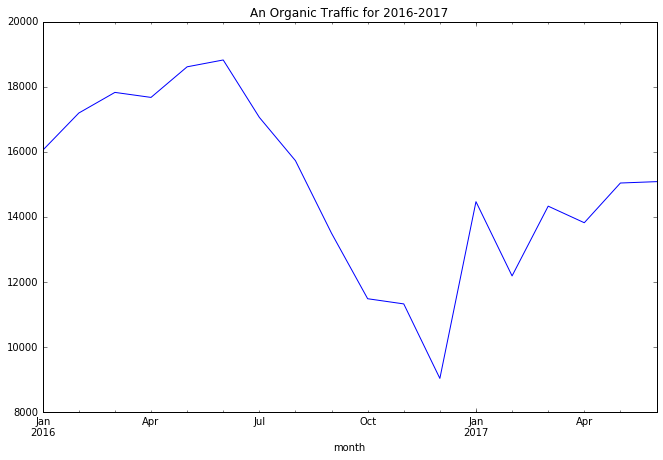

In [124]:
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(1,1,1)
organic['2016':'2017'].traffic.plot(ax=ax)
ax.set_title('An Organic Traffic for 2016-2017')

Источник: https://metrika.yandex.ru

<p><b>YoY</b> — изменения год к году, %
<br/><b>MoM</b> — изменения месяц к месяцу, %</p>

### Подсветка данных

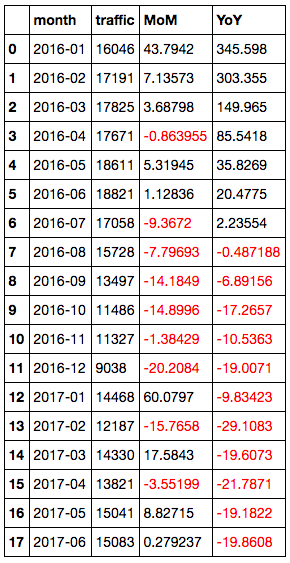

In [66]:
from IPython.display import display, Image
display(Image('img/data_neg_select.png'))

Отрицательные изменения (падение трафика) выделены красным.

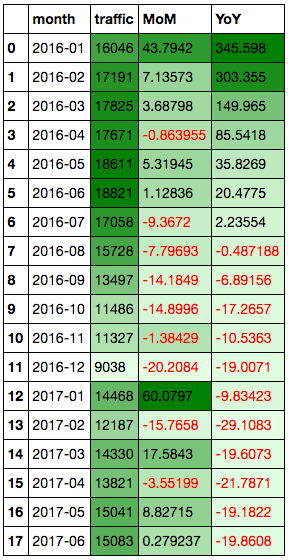

In [67]:
display(Image('img/data_grad.png'))

Ячейки таблицы градиентно залиты цветом в зависимости от величины содержимого.

### Диаграмма изменеия значений MoM 

In [50]:
negative_MoM = organic['MoM'] < 0

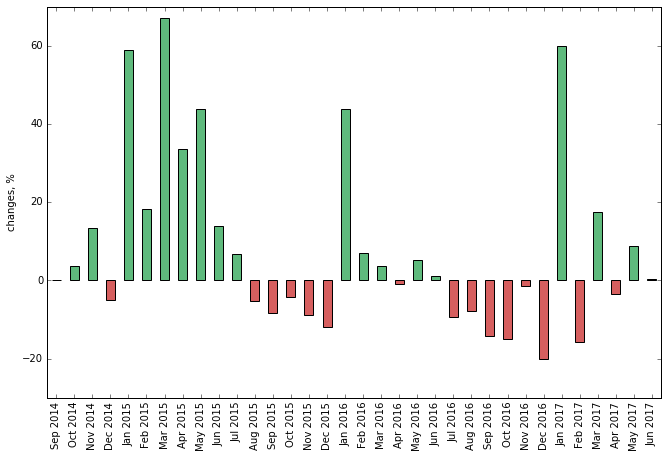

In [64]:
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(1,1,1)
organic.MoM.plot(ax=ax, kind='bar', stacked=True, 
                 color=negative_MoM.map({True: '#d65f5f', False: '#5fba7d'}));
ax.set_ylabel('changes, %');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in organic.index]);

На диаграмме чётко видна сезонная волатильность трафика.

## 3. Анализ позиций

Позиции снимаются приблизительно один раз в неделю.

In [113]:
positions_dynamic

domvesta.ru salon-love-forever.ru bel-avantage.ru  \
2017-06-03 вечерние платья           30                    13              51   
           свадебные платья           5                    18               3   
           свадебный салон            5                     3              20   
2017-06-10 вечерние платья           20                    13              51   
           свадебные платья           4                    22               3   
           свадебный салон            6                     4              16   
2017-06-20 вечерние платья           25                    15              51   
           свадебные платья           7                    17               3   
           свадебный салон            4                     3               9   
2017-06-28 вечерние платья           17                    15              51   
           свадебные платья           6                    11               2   
           свадебный салон            2                     4              15   
2017-07-05 вечерние платья           18                    12              51   
           свадебные платья           3                    10               2   
           свадебный салон            8                     5              12   
2017-07-12 вечерние платья     ↓21 (-3)              ↓15 (-3)              51   
           свадебные платья     ↓6 (-3)              ↓11 (-1)         ↓3 (-1)   
           свадебный салон      ↑3 (+5)              ↓12 (-7)        ↑10 (+2)   

                            marytrufel.ru  
2017-06-03 вечерние платья             45  
           свадебные платья             8  
           свадебный салон              7  
2017-06-10 вечерние платья             51  
           свадебные платья            15  
           свадебный салон             11  
2017-06-20 вечерние платья             42  
           свадебные платья            10  
           свадебный салон             17  
2017-06-28 вечерние платья             36  
           свадебные платья            17  
           свадебный салон              8  
2017-07-05 вечерние платья             43  
           свадебные платья            19  
           свадебный салон              3  
2017-07-12 вечерние платья       ↓51 (-8)  
           свадебные платья      ↓20 (-1)  
           свадебный салон        ↓4 (-1)

Источник: https://xml.yandex.ru

Позиции в таблице и в текущей выдаче Яндекса могут отличаться из-за особенностей сервиса xml.yandex, а также от индивидуализации SERP.

**51** — отсутствие сайта в ТОП-50.

TODO: переписать чекер, используя POST-метод для получения данных, т.к. GET даёт искаженные результаты.